In [ ]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
from transformers import pipeline
import matplotlib.pyplot as plt

In [7]:
def load_data(file_name):
    data = pd.read_csv(file_name, delimiter=",")
    return data

file_name = 'tweets-data/preprocessed_dataset_kurikulum_merdeka2.csv'
df = load_data(file_name)
df.head(4)

,full_text,filtered,cleaned,tokenize,normalisasi
0,Selamat hari guru jg buat calon guru yang cape...,selamat hari guru jg buat calon guru yang cape...,selamat hari guru jg calon guru capek bgt ma k...,"['selamat', 'hari', 'guru', 'jg', 'calon', 'gu...","['selamat', 'hari', 'guru', 'juga', 'calon', '..."
1,@mediaindonesia Bukannya kurikulum merdeka mau...,bukannya kurikulum merdeka mau diganti buu,bukan kurikulum merdeka ganti buu,"['bukan', 'kurikulum', 'merdeka', 'ganti', 'buu']","['bukan', 'kurikulum', 'merdeka', 'ganti', 'buu']"
2,@syahrindraaa @GhibahNaqMetal For Kurikulum Me...,for kurikulum merdeka,for kurikulum merdeka,"['for', 'kurikulum', 'merdeka']","['untuk', 'kurikulum', 'merdeka']"
3,Modul ajar ‍‍‍ Duhhh siapa yang udah dah perna...,modul ajar duhhh siapa yang udah dah pernah bi...,modul ajar duhhh siapa udah pernah modul ajar ...,"['modul', 'ajar', 'duhhh', 'siapa', 'udah', 'p...","['modul', 'ajar', 'duhhh', 'siapa', 'sudah', '..."


In [ ]:
# Mengonversi list token ke string
df['normalisasi'] = df['normalisasi'].apply(lambda x: ' '.join(eval(x)))
# Menampilkan hasil konversi
df.head()

,full_text,filtered,cleaned,tokenize,normalisasi
0,Selamat hari guru jg buat calon guru yang cape...,selamat hari guru jg buat calon guru yang cape...,selamat hari guru jg calon guru capek bgt ma k...,"['selamat', 'hari', 'guru', 'jg', 'calon', 'gu...",selamat hari guru juga calon guru kesal sekali...
1,@mediaindonesia Bukannya kurikulum merdeka mau...,bukannya kurikulum merdeka mau diganti buu,bukan kurikulum merdeka ganti buu,"['bukan', 'kurikulum', 'merdeka', 'ganti', 'buu']",bukan kurikulum merdeka ganti buu
2,@syahrindraaa @GhibahNaqMetal For Kurikulum Me...,for kurikulum merdeka,for kurikulum merdeka,"['for', 'kurikulum', 'merdeka']",untuk kurikulum merdeka
3,Modul ajar ‍‍‍ Duhhh siapa yang udah dah perna...,modul ajar duhhh siapa yang udah dah pernah bi...,modul ajar duhhh siapa udah pernah modul ajar ...,"['modul', 'ajar', 'duhhh', 'siapa', 'udah', 'p...",modul ajar duhhh siapa sudah pernah modul ajar...
4,Guru yang baik adalah guru yang merdeka dari k...,guru yang baik adalah guru yang merdeka dari k...,guru baik adalah guru merdeka kurikulum bukan ...,"['guru', 'baik', 'adalah', 'guru', 'merdeka', ...",guru baik adalah guru merdeka kurikulum bukan ...


In [ ]:
# Inisialisasi model dan tokenizer
pretrained_name = "w11wo/indonesian-roberta-base-sentiment-classifier"
nlp = pipeline(
    "sentiment-analysis",
    model=pretrained_name,
    tokenizer=pretrained_name
)

# Analisis sentimen dan simpan hasil ke kolom baru
labels = []
sentiment_scores = []

for text in df['normalisasi']:
    result = nlp(text)[0]  # Mengambil hasil analisis pertama
    labels.append(result['label'])
    sentiment_scores.append(result['score'])

# Menambahkan kolom baru ke DataFrame
df['sentiment_label'] = labels
df['sentiment_score'] = sentiment_scores

# Display results
df[['normalisasi', 'sentiment_score', 'sentiment_label']].head(10)

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


,normalisasi,sentiment_score,sentiment_label
0,selamat hari guru juga calon guru kesal sekali...,0.999239,negative
1,bukan kurikulum merdeka ganti buu,0.997182,negative
2,untuk kurikulum merdeka,0.997534,neutral
3,modul ajar duhhh siapa sudah pernah modul ajar...,0.898265,neutral
4,guru baik adalah guru merdeka kurikulum bukan ...,0.925042,negative
5,soal bahasa indonesia kelas semester kurikulum...,0.999136,neutral
6,bukan kurikulum merdeka,0.998350,negative
7,kurikulum merdeka bukan merdeka malah kesal ma...,0.999195,negative
8,iya soal angkat sekolah pakai kurikulum merdek...,0.998536,negative
9,tulis rupa refleksi atas laksana kurikulum mer...,0.998594,neutral


Jumlah Positif: 116
Jumlah Negatif: 1108
Jumlah Netral: 1041


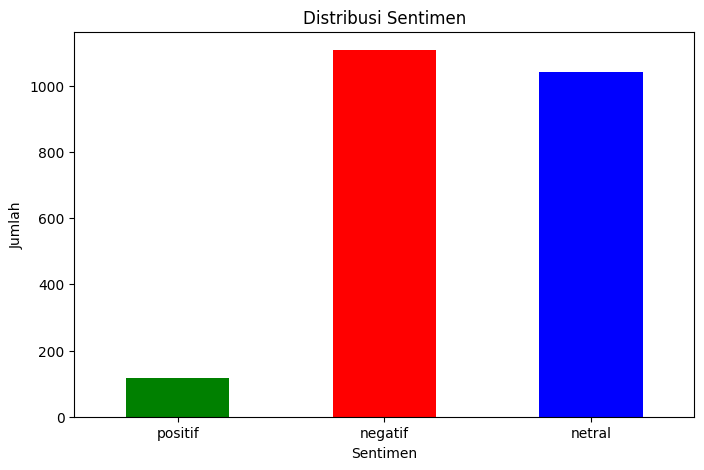

In [ ]:
# Menghitung jumlah label sentimen
sentiment_counts = df['sentiment_label'].value_counts()

# Memastikan bahwa label sentimen yang ada adalah 'positif', 'negatif', dan 'netral'
# Jika tidak ada label 'netral', Anda bisa menyesuaikan sesuai data yang ada
positive_count = sentiment_counts.get('positive', 0)
negative_count = sentiment_counts.get('negative', 0)
neutral_count = sentiment_counts.get('neutral', 0)

# Menampilkan hasil perhitungan jumlah setiap sentimen
print(f"Jumlah Positif: {positive_count}")
print(f"Jumlah Negatif: {negative_count}")
print(f"Jumlah Netral: {neutral_count}")

# Visualisasi dengan bar chart
plt.figure(figsize=(8, 5))
sentiment_counts = pd.Series({'positif': positive_count, 'negatif': negative_count, 'netral': neutral_count})
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)
plt.show()

In [6]:
df.to_csv('tweets-data/labeled_dataset_kurikulum_merdeka2.csv', index=False)